<h2>Building my Data Story</h2>
<h3>Nora Keenan</h3>
February 24, 2019

After reviewing the available fields and the quality of the support documentation, I've narrowed down the dataset to 24 features ranging from age, sex and education level to marital status and state.  The dataset consists of mostly caategorical values represeted by numerical response codes.

I applied the following to the dataset so the data more closely reflects its categorical nature:

1.  Changed numerical categoricals to their appropriate string equivalent.
2.  Created a columns with ordinal values for those categoricals where order makes sense (income and education)
3.  Added a column to act as a flag for whether or not the respondent had ever visited the library.


In [1]:
#import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
#Build the dataframe
filepath = "C:\\Users\\nkeen\\Documents\\Capstone1\\Data\\Survey_results.xlsx"

excelfile = pd.read_excel(filepath)

keycols = excelfile[['psraid', 'sex', 'age', 'marital', 'par', 'educ2', 'emplnw', 'disa', 'party', 'ideo', 'race', 'inc']]
keycols1 = excelfile[['psraid', 'hh1', 'live1', 'reg', 'eminuse','intmob', 'home3nw', 'bbhome1', 'smart1', 'libusea', 'libuseb', 'lib_frq']]

totalcol = pd.merge(keycols, keycols1, how='inner', on='psraid')

totalcol = totalcol.replace("  ", 8)
totalcol = totalcol.replace(" ", 8)
totalcol = totalcol.drop('psraid', axis=1)

Index(['sex', 'age', 'marital', 'par', 'educ2', 'emplnw', 'disa', 'party',
       'ideo', 'race', 'inc', 'hh1', 'live1', 'reg', 'eminuse', 'intmob',
       'home3nw', 'bbhome1', 'smart1', 'libusea', 'libuseb', 'lib_frq'],
      dtype='object')

In [3]:
#Change numerical categorical values to text categorical values

totalcol['sex'] = totalcol['sex'].replace({1: "Male", 2:"Female"})

totalcol['marital'] = totalcol['marital'].replace({1:"Married", 2:"Cohabitating", 3:"Divorced", 4:"Separated", 5:"Widowed", 6:"Never Married", 8:"Unknown", 9:"Refused"})

totalcol['par'] = totalcol['par'].replace({1:"Yes", 2:"No", 8:"Unknown", 9:"Refused"})

totalcol['educ2_ordinal'] = totalcol['educ2']

totalcol['educ2'] = totalcol['educ2'].replace({1: "No HS", 2:"Some HS", 3:"HS Grad", 4:"Some College", 5:"Assoc Degree", 6:"Bach Degree", 7:"Some Grad School", 8:"Grad School", 98:"Unknown", 99:"Refused"})

totalcol['educ2_ordinal'] = totalcol['educ2_ordinal'].replace({98:0, 99:0})

totalcol['emplnw'] = totalcol['emplnw'].replace({1:"Full Time", 2:"Part Time", 3:"Retired", 4:"Unemployed", 5:"Self Employed", 6:"Disabled", 7:"Student", 8:"Other", 98:"Unknown", 99:"Refused"})

totalcol['disa'] = totalcol['disa'].replace({1:"Yes", 2:"No", 8:"Unknown", 9:"Refused"})

totalcol['party'] = totalcol['party'].replace({1:"Republican", 2:"Democrat", 3:"Independent", 4:"No Preference", 5:"Other", 8:"Unknown", 9:"Refused"})

totalcol['ideo'] = totalcol['ideo'].replace({1:"Very Consrv", 2:"Consrv", 3:"Moderate", 4:"Liberal", 5:"Very Liberal", 8:"Unknown", 9:"Refused"})

totalcol['race'] = totalcol['race'].replace({1:"White", 2:"Black", 3:"Asian", 4:"Other", 5:"Native American", 6:"Pac Islander", 7:"Hispanic", 8:"Unknown", 9:"Refused"})

totalcol['inc_ordinal'] = totalcol['inc']

totalcol['inc'] = totalcol['inc'].replace({1:"<$10K", 2:"$10K-$20K", 3:"$20K-$30K", 4:"$30K-$40K", 5:"$40K-$50K", 6:"$50K-$75K", 7:"$75K-$100K", 8:"$100K-$150K", 98:"Unknown", 99:"Refused", 9:"$150K+"})

totalcol['inc_ordinal'] = totalcol['inc_ordinal'].replace({98:0, 99:0})

totalcol['live1'] = totalcol['live1'].replace({1:"Large City", 2:"Suburb", 3:"Small City or Town", 4:"Rural", 8:"Unknown", 9:"Refused"})

totalcol['reg'] = totalcol['reg'].replace({1:"Definitely", 2:"Probably", 3:"Not Registered", 8:"Unknown", 9:"Refused"})

totalcol['eminuse'] = totalcol['eminuse'].replace({1:"Yes", 2:"No", 8:"Unknown", 9:"Refused"})

totalcol['intmob'] = totalcol['intmob'].replace({1:"Yes", 2:"No", 8:"Unknown", 9:"Refused"})

totalcol['home3nw'] = totalcol['home3nw'].replace({1:"Yes", 2:"No", 8:"Unknown", 9:"Refused"})

totalcol['bbhome1'] = totalcol['bbhome1'].replace({1:"Dial-Up", 2:"Higher Speed", 3:"Both", 4:"Cell Phone Only", 5:"None", 8:"Unknown", 9:"Refused"})

totalcol['smart1'] = totalcol['smart1'].replace({1:"Yes", 2:"No", 8:"Unknown", 9:"Refused"})

totalcol['libusea_ordinal'] = totalcol['libusea']

totalcol['libusea'] = totalcol['libusea'].replace({1:"Yes, < 12 Mo.", 2:"Yes, > 12 Mo.", 3:"Never", 8:"Unknown", 9:"Refused"})

totalcol['libusea_ordinal'] = totalcol['libusea_ordinal'].replace({8:0, 9:0, 3:0, 1:2, 2:1})

totalcol['libuseb'] = totalcol['libuseb'].replace({1:"Yes, < 12 Mo.", 2:"Yes, > 12 Mo.", 3:"Never", 8:"Unknown", 9:"Refused"})

totalcol['lib_frq'] = totalcol['lib_frq'].replace({1:"Weekly", 2:"Semi-Monthly", 3:"Monthly", 4:"Less Often", 8:"Unknown", 9:"Refused"})

totalcol.head()

,sex,age,marital,par,educ2,emplnw,disa,party,ideo,race,...,intmob,home3nw,bbhome1,smart1,libusea,libuseb,lib_frq,educ2_ordinal,inc_ordinal,libusea_ordinal
0,Male,30,Never Married,No,Some College,Part Time,Yes,Democrat,Very Liberal,Hispanic,...,Yes,Yes,Higher Speed,Yes,"Yes, > 12 Mo.",Never,Unknown,4,2,1
1,Female,77,Widowed,No,Bach Degree,Disabled,No,Democrat,Liberal,Hispanic,...,No,Unknown,Unknown,Unknown,"Yes, > 12 Mo.",Never,Unknown,6,0,1
2,Male,45,Married,Yes,Bach Degree,Part Time,No,Republican,Liberal,Hispanic,...,Yes,Yes,Higher Speed,Yes,"Yes, > 12 Mo.",Never,Unknown,6,2,1
3,Male,23,Never Married,No,Bach Degree,Unemployed,No,Independent,Very Liberal,Hispanic,...,No,Yes,Higher Speed,No,"Yes, < 12 Mo.","Yes, < 12 Mo.",Monthly,6,7,2
4,Male,25,Separated,No,Bach Degree,Part Time,No,Democrat,Liberal,Hispanic,...,Yes,Yes,Higher Speed,Yes,"Yes, < 12 Mo.","Yes, < 12 Mo.",Weekly,6,2,2


After cleaning the dataset and creating ordinal columns for those categoricals with a logical order (education and income), I chose to analyze the correlation.  The strongest negative correlations are between age (age) and the number of people in the household (hh1) at -0.2.  The strongest positive correlation is between library use (libusea) and education level (educ2_ordinal) at 0.3 and education level (educ2_ordinal) and income (inc_ordinal).  This implies that those with a higher education level are more likely to visit the library often and have a higher income.

The libusea_ordinal variable is ranked 0 for never visited, 1 for visited but not in the last year, and 2 for visited within the past year.

<function matplotlib.pyplot.close(fig=None)>

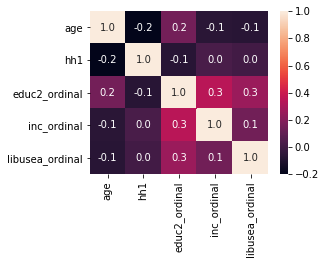

In [4]:
#Generate Correlation Heatmap without has_visited flag

plt.figure(figsize = (8,6))
sns.heatmap(totalcol.corr(), annot=True, fmt=".1f")
plt.close


I was interested to determine if other correlations would become more obvious of library vistation was a binary flag rather than a ordinal ranking.  I added a column called 'has_visited' that is a 0/1 variable: 0 for never visited, 1 for visited, and reran the correlation matrix.

In [5]:
#Add column with a binary flag for whether or not the respondent has
#ever visited the library

def visited(c):
    if c['libusea'] == "Yes, < 12 Mo.":
        return 1
    elif c['libusea'] == "Yes, > 12 Mo.":
        return 1
    else:
        return 0

totalcol['has_visited'] = totalcol.apply(visited, axis=1)

totalcol.to_csv('totalcol.csv')

<function matplotlib.pyplot.close(fig=None)>

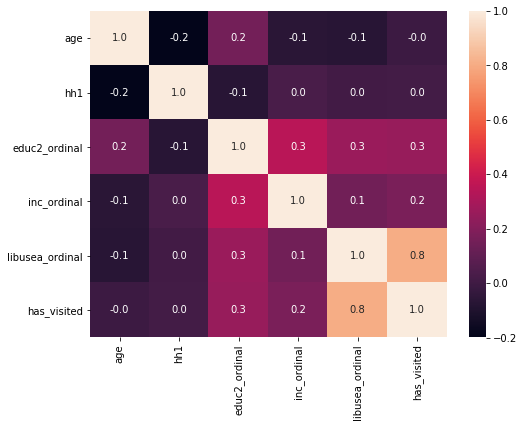

In [15]:
#Generate Correlation Heatmap

plt.figure(figsize = (8,6))
sns.heatmap(totalcol.corr(), annot=True, fmt=".1f")
plt.close


The new feature, has_visited, shows a stonger correlation with income (inc) at 0.2 than the libusea_ordinal feature which was 0.1.  Perhaps the multiple options for libusea acted to dilute the correlation between income and visitation.

<h3>Breakdown of additional features</h3>

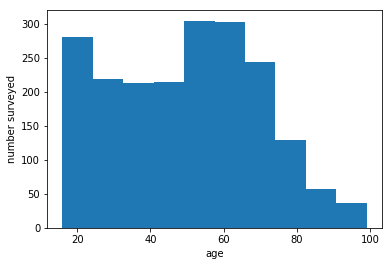

In [9]:
#Age Distribution

_ = totalcol['age'].plot(kind='hist')
_ = plt.xlabel('age')
_ = plt.ylabel('number surveyed')
plt.show()


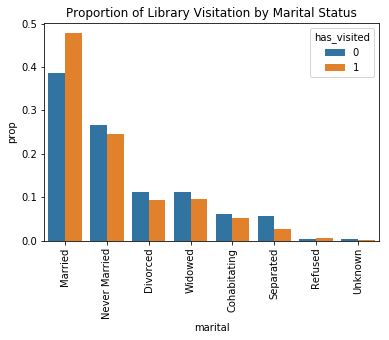

In [19]:
#Library Visitation by Marital Status

df = totalcol
x, y, hue = "marital", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Marital Status")
plt.show()

   has_visited      par      prop
0            0       No  0.769863
1            0      Yes  0.216438
2            0  Unknown  0.013699
3            1       No  0.752288
4            1      Yes  0.245882
5            1  Unknown  0.001220
6            1  Refused  0.000610


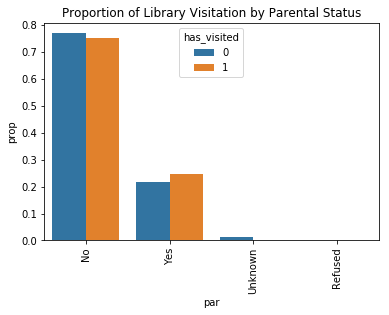

In [38]:
#Library Visitation by Parental Status

df = totalcol
x, y, hue = "par", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Parental Status")
plt.show()


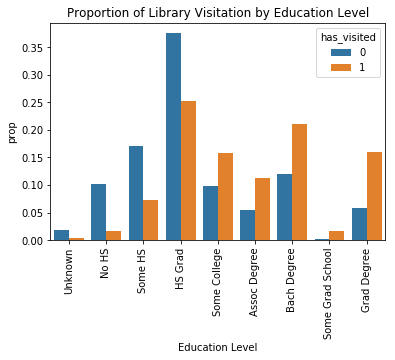

In [18]:
#Library Visitation by Education Level

df = totalcol
x, y, hue = "educ2_ordinal", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(range(9), ['Unknown', 'No HS', 'Some HS', 'HS Grad', 'Some College', 'Assoc Degree', 'Bach Degree', 'Some Grad School', 'Grad Degree'], rotation=90)
_ = plt.xlabel("Education Level")
_ = plt.title("Proportion of Library Visitation by Education Level")
plt.show()

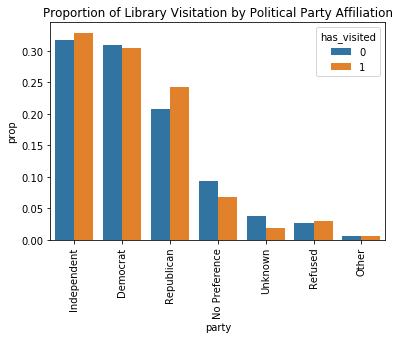

In [13]:
#Library Visitation by Political Party Affiliation

df = totalcol
x, y, hue = "party", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Political Party Affiliation")
plt.show()


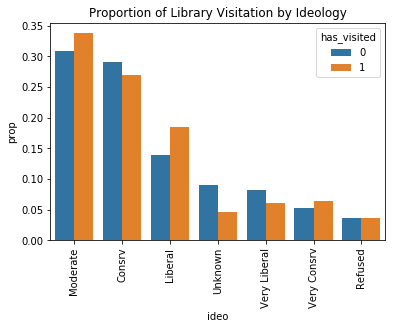

In [14]:
#Library Visitation by Ideology

df = totalcol
x, y, hue = "ideo", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Ideology")
plt.show()


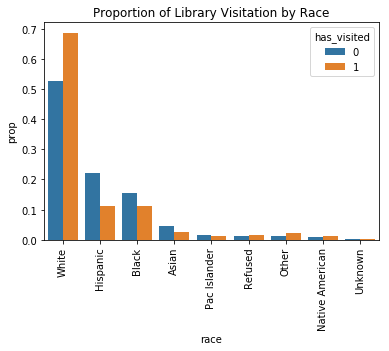

In [15]:
#Library Visitation by Race

df = totalcol
x, y, hue = "race", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Race")
plt.show()

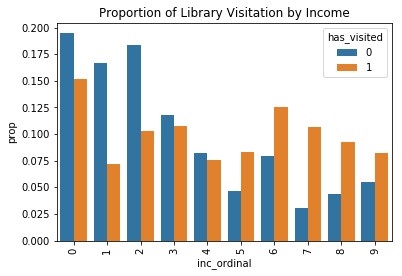

In [16]:
#Library Visitation by Income

df = totalcol
x, y, hue = "inc_ordinal", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Income")
plt.show()


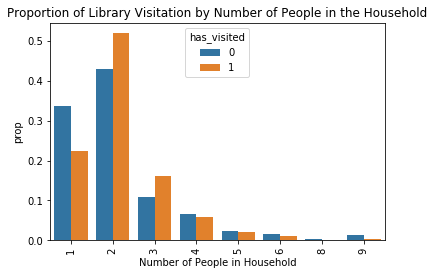

In [17]:
#Library Visitation by Number of People in the Household

df = totalcol
x, y, hue = "hh1", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Number of People in the Household")
_ = plt.xlabel("Number of People in Household")
plt.show()

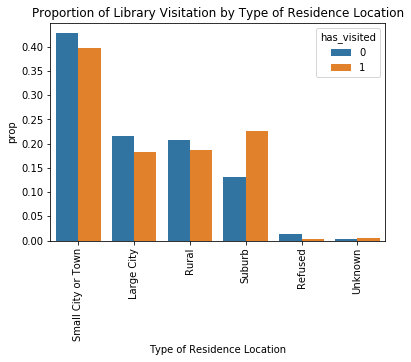

In [18]:
#Library Visitation by Type of Residence Location

df = totalcol
x, y, hue = "live1", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Type of Residence Location")
_ = plt.xlabel("Type of Residence Location")
plt.show()

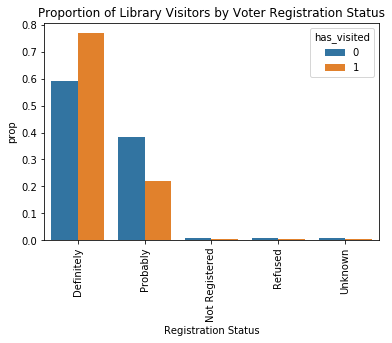

In [19]:
#Library Visitation by Voter Registration

df = totalcol
x, y, hue = "reg", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitors by Voter Registration Status")
_ = plt.xlabel("Registration Status")
plt.show()

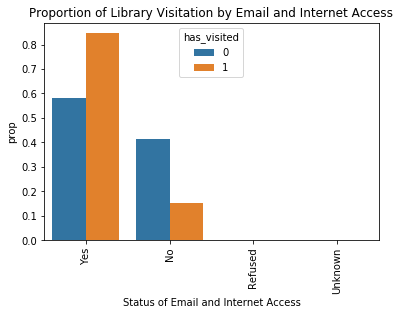

In [21]:
#Library Visitation by Email and Internet Access

df = totalcol
x, y, hue = "eminuse", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Email and Internet Access")
_ = plt.xlabel("Status of Email and Internet Access")
plt.show()

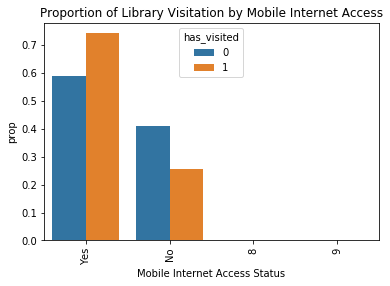

In [22]:
#Library Visitation by Mobile Internet Access

df = totalcol
x, y, hue = "intmob", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Mobile Internet Access")
_ = plt.xlabel("Mobile Internet Access Status")
plt.show()

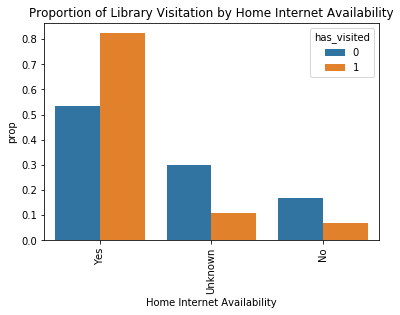

In [23]:
#Library Visitation by Internet Access at Home

df = totalcol
x, y, hue = "home3nw", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Home Internet Availability")
_ = plt.xlabel("Home Internet Availability")
plt.show()

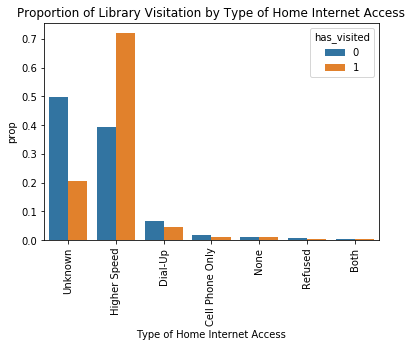

In [24]:
#Library Visitation by Type of Home Internet Access

df = totalcol
x, y, hue = "bbhome1", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Type of Home Internet Access")
_ = plt.xlabel("Type of Home Internet Access")
plt.show()

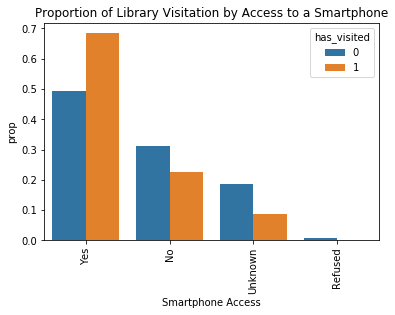

In [25]:
#Library Visitation by Access to a Smartphone

df = totalcol
x, y, hue = "smart1", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Access to a Smartphone")
_ = plt.xlabel("Smartphone Access")
plt.show()

<h3>Inferences</h3>

In the analyses above I used a heatmap, bar chart and histogram to gain insights from the data.  It appears that <u>income and education level</u> distributions are different for people that visit the library compared to those that don't.  Also, <u>Democrats and Independents use the library more than Republicans</u>. <u>Broadband availability at home does not appear to be a motivating factor for library usage</u>.  I would expect to see lower broadband avaiability at home for those that visit the library if in fact the library was a main point of access for them.

<h4>Follow up statistics</h4>
In the inferential statistics section I would like to test if income and education levels are statistically different between visitors and non-visitors.  